# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API keys
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# create a list of all of the variables that I want to pull in the api call
citylist = []
cloudiness= []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# create the url
units = "metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={wkey}&units={units}&q="

line = "-----------------------------"
print("Beginning Data Retrieval")
print(line)

# loop through the cities list and fill the lists if that city was found
count = 0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {count} / {city}")
        citylist.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count += 1
    except:
        print("City not found. Skipping...")
        cities.remove(city)
        count += 1
        pass
print(line)
print("Data Retrieval Complete")
print(line)


Beginning Data Retrieval
-----------------------------
Processing Record 0 / hambantota
Processing Record 1 / cherskiy
Processing Record 2 / taolanaro
City not found. Skipping...
Processing Record 3 / marcona
City not found. Skipping...
Processing Record 4 / mar del plata
Processing Record 5 / ushuaia
Processing Record 6 / chokurdakh
Processing Record 7 / calvinia
Processing Record 8 / vila do maio
Processing Record 9 / busselton
Processing Record 10 / port alfred
Processing Record 11 / ruteng
Processing Record 12 / lorengau
Processing Record 13 / severo-kurilsk
Processing Record 14 / avarua
Processing Record 15 / tautira
Processing Record 16 / albany
Processing Record 17 / hobart
Processing Record 18 / hibbing
Processing Record 19 / rikitea
Processing Record 20 / arraial do cabo
Processing Record 21 / nhulunbuy
Processing Record 22 / fortuna
Processing Record 23 / cape town
Processing Record 24 / puerto ayora
Processing Record 25 / ziway
Processing Record 26 / illoqqortoormiut
City no

Processing Record 227 / banes
Processing Record 228 / saint-francois
Processing Record 229 / beringovskiy
Processing Record 230 / ribeira grande
Processing Record 231 / zyryanka
Processing Record 232 / asfi
Processing Record 233 / te anau
Processing Record 234 / airai
Processing Record 235 / skibbereen
Processing Record 236 / dwarka
Processing Record 237 / luderitz
Processing Record 238 / taoudenni
Processing Record 239 / boyolangu
Processing Record 240 / upernavik
Processing Record 241 / college
Processing Record 242 / dondo
Processing Record 243 / lockport
Processing Record 244 / buraydah
Processing Record 245 / labutta
City not found. Skipping...
Processing Record 246 / le port
Processing Record 247 / palmer
Processing Record 248 / fukuma
Processing Record 249 / warwick
Processing Record 250 / grand gaube
Processing Record 251 / abdulino
Processing Record 252 / longyearbyen
Processing Record 253 / camopi
Processing Record 254 / mendoza
Processing Record 255 / puerto narino
Processin

Processing Record 463 / changtu
Processing Record 464 / lewisporte
Processing Record 465 / griffith
Processing Record 466 / sisimiut
Processing Record 467 / kristiinankaupunki
Processing Record 468 / carauari
Processing Record 469 / evans
Processing Record 470 / olinda
Processing Record 471 / alcudia
Processing Record 472 / ancud
Processing Record 473 / champerico
Processing Record 474 / codrington
Processing Record 475 / najran
Processing Record 476 / tura
Processing Record 477 / evansville
Processing Record 478 / khandyga
Processing Record 479 / capao da canoa
Processing Record 480 / hobyo
Processing Record 481 / tetouan
Processing Record 482 / padang
Processing Record 483 / troitsko-pechorsk
Processing Record 484 / aloleng
Processing Record 485 / chapais
Processing Record 486 / phalaborwa
Processing Record 487 / manicore
Processing Record 488 / gua musang
Processing Record 489 / viligili
City not found. Skipping...
Processing Record 490 / santa vitoria
Processing Record 491 / wajima

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# take those lists and create a dataframe, then save that dataframe to a csv
# the csv path was created and put into a variable called earlier
city_data_dict = {
    'City':citylist, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity,
    "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file)

In [5]:
# display the dataframe create a variable for the date
date = pd.to_datetime(city_data_df['Date'], unit='s')[0]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hambantota,40,LK,1580012509,83,6.12,81.12,27.00,6.70
1,Cherskiy,100,RU,1580012509,96,68.75,161.30,-27.74,1.21
2,Mar del Plata,0,AR,1580012509,76,-38.00,-57.56,17.78,3.41
3,Ushuaia,75,AR,1580012405,81,-54.80,-68.30,7.00,11.80
4,Chokurdakh,100,RU,1580012510,86,70.63,147.92,-30.13,2.68
...,...,...,...,...,...,...,...,...,...
505,Yining,100,CN,1580012315,95,29.04,114.56,5.22,0.86
506,Brainerd,90,US,1580012343,85,46.36,-94.20,-3.00,0.81
507,Usinsk,91,RU,1580012575,100,65.99,57.53,-23.87,0.49
508,Nawa,0,IN,1580012575,46,27.02,75.00,14.12,0.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

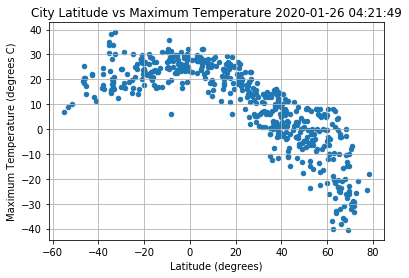

In [7]:
lat_temp_plot = city_data_df.plot.scatter(y="Max Temp", x="Lat", grid=True)
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel('Latitude (degrees)')
plt.title(f'City Latitude vs Maximum Temperature {date}')
plt.savefig('output_data/cit-vs-temp.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities maxiumn temperature is dependant of the latitude. 

#### Latitude vs. Humidity Plot

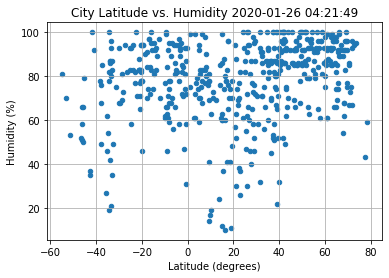

In [9]:
lat_hum_plot = city_data_df.plot.scatter(y='Humidity', x='Lat', grid=True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title(f"City Latitude vs. Humidity {date}")
plt.savefig('output_data/cit-vs-humidity.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities humidity is dependant of the latitude. 

#### Latitude vs. Cloudiness Plot

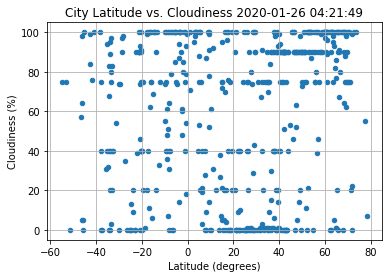

In [10]:
lat_clouds_plot = city_data_df.plot.scatter(y='Cloudiness', x='Lat', grid=True)
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.savefig('output_data/cit-vs-coudiness.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities cloudiness is dependant of the latitude. 

#### Latitude vs. Wind Speed Plot

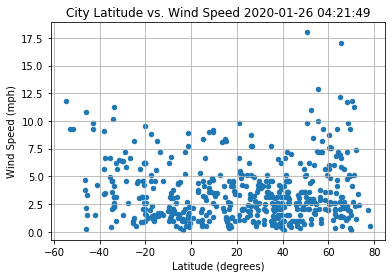

In [11]:
lat_clouds_plot = city_data_df.plot.scatter(y='Wind Speed', x='Lat', grid=True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.savefig('output_data/cit-vs-wind.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities wind speed is dependant of the latitude. 

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_regress_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_value = f'r-squared = {round(rvalue,4)}'
    plt.scatter(x_values, y_values)
    plt.grid()
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'{line_eq} {r_value}', (np.min(x_values),np.min(y_values)), fontsize=10, color='r')
    return(plt)

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = city_data_df[city_data_df["Lat"]>0]
southern_hem_df = city_data_df[city_data_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

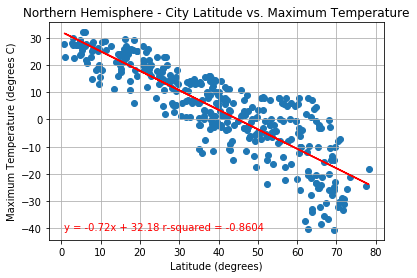

In [14]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Max Temp"])
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Maximum Temperature")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-temp-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, it could be said that the maximum temperature is corellated to the latitude of that city.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

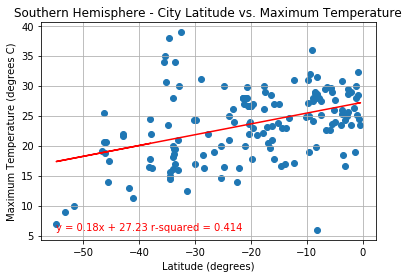

In [15]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Max Temp"])
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Maximum Temperature")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-temp-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the maximum temperature may not corellated to the latitude of that city.It should be noted that there are far less data points in the sothern hemisphere (at least when I did this particulare data pull).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

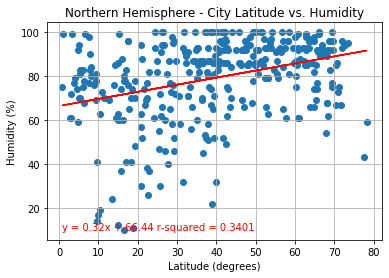

In [16]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-humidity-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the humdity is probably not corellated to the latitude of that city. Consider looking seasonally.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

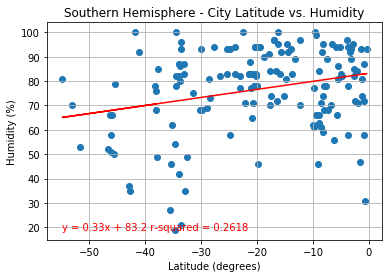

In [17]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-humidity-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the southern hemisphere, the humdity is probably not corellated to the latitude of that city. Consider looking seasonally.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

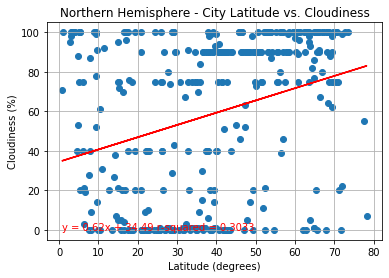

In [18]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-coludiness-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the cloudiness is probably not corellated to the latitude of that city.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

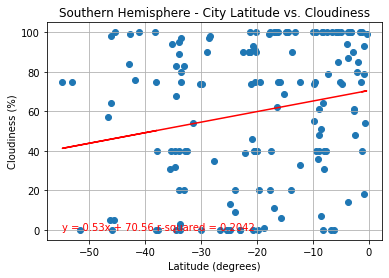

In [19]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-coludiness-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the cloudiness is probably not corellated to the latitude of that city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

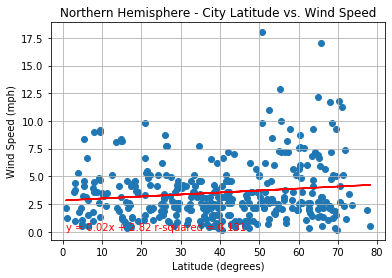

In [20]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-wind-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the wind speed is probably not corellated to the latitude of that city. The wind speed seems to be mostly constant across latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

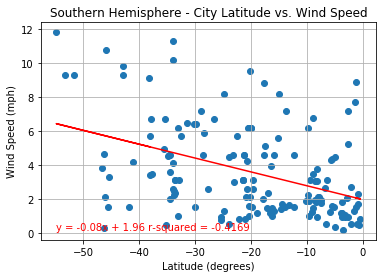

In [21]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-wind-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the wind speed is probably not corellated to the latitude of that city. The wind speed seems to be mostly constant across latitude.